<a href="https://colab.research.google.com/github/223t1a3119/DL-Lab/blob/main/DL_WEEK1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Load the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [2]:
# Normalize the pixel values to be between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0

# Reshape the data to be in the form of (samples, height, width, channels)
X_train = X_train.reshape((-1, 28, 28, 1))
X_test = X_test.reshape((-1, 28, 28, 1))


In [3]:
from sklearn.model_selection import train_test_split

# Split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [5]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))


Epoch 1/10
1500/1500 [==============================] - 51s 33ms/step - loss: 0.1485 - accuracy: 0.9558 - val_loss: 0.0504 - val_accuracy: 0.9842
Epoch 2/10
1500/1500 [==============================] - 46s 31ms/step - loss: 0.0480 - accuracy: 0.9850 - val_loss: 0.0533 - val_accuracy: 0.9845
Epoch 3/10
1500/1500 [==============================] - 48s 32ms/step - loss: 0.0313 - accuracy: 0.9899 - val_loss: 0.0468 - val_accuracy: 0.9858
Epoch 4/10
1500/1500 [==============================] - 47s 32ms/step - loss: 0.0230 - accuracy: 0.9925 - val_loss: 0.0495 - val_accuracy: 0.9858
Epoch 5/10
1500/1500 [==============================] - 46s 31ms/step - loss: 0.0174 - accuracy: 0.9943 - val_loss: 0.0459 - val_accuracy: 0.9875
Epoch 6/10
1500/1500 [==============================] - 49s 32ms/step - loss: 0.0131 - accuracy: 0.9957 - val_loss: 0.0418 - val_accuracy: 0.9893
Epoch 7/10
1500/1500 [==============================] - 51s 34ms/step - loss: 0.0107 - accuracy: 0.9963 - val_loss: 0.0342 -

313/313 [==============================] - 7s 19ms/step
Accuracy: 0.9916
Precision: 0.9916
Recall: 0.9916
F1 Score: 0.9916


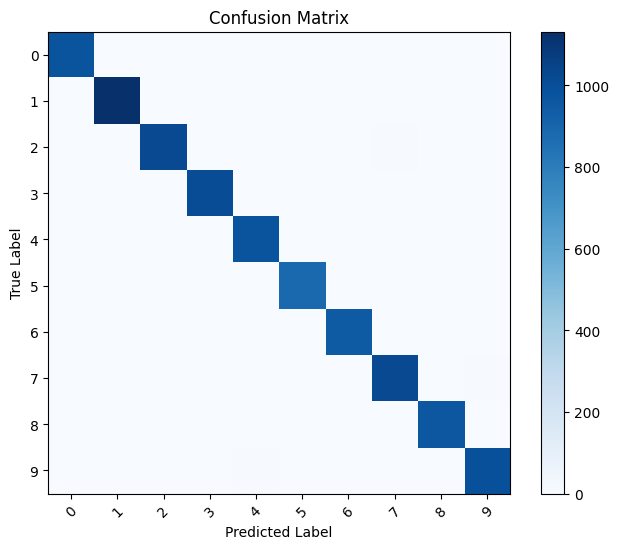

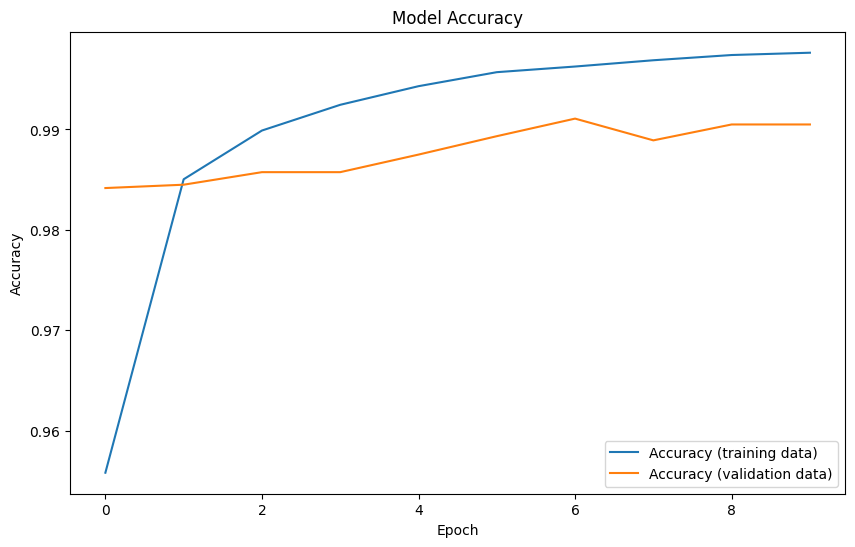

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Predictions on test set
y_pred = np.argmax(model.predict(X_test), axis=-1)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test), rotation=45)
plt.yticks(tick_marks, np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Accuracy (training data)')
plt.plot(history.history['val_accuracy'], label='Accuracy (validation data)')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()
